## Reaching Task: Exercise 2 (Generalisation)
Submitted by **Mohammed Abbas Ansari, Kai Rothe**

### Task 1: Implementation of recording mode and new experiment

#### Savings Task Design
| Attempts | Perturbation Type | Perturbation Angle | Target Angle |
| :-: | :-: | :-: | :-: |
| 1 - 20 | - | - | 0° |
| 21 - 80 | sudden | 30° | 0° |
| 81 - 100 | - | - | 0° |
| 101 - 160 | sudden | 30° | 0° |
| 161 - 180 | - | - | 0° |

Where the same task is repeated after an interval of 30 minutes to investigate if adaption is saved across time.

#### Generalisation Task Design 
| Attempts | Perturbation Type | Perturbation Angle | Target Angle |
| :-: | :-: | :-: | :-: |
| 1 - 20 | - | - | 30° |
| 21 - 80 | sudden | 30° | 30° |
| 81 - 100 | - | - | 30° |
| 101 - 120 | - | - | 60° |
| 121 - 180 | sudden | 30° | 60° |
| 181 - 200 | - | - | 60° |
| 201 - 220 | - | - | 45° |
| 221 - 280 | sudden | 30° | 45° |
| 281 - 300 | - | - | 45° |
| 301 - 320 | - | - | 130° |
| 321 - 380 | sudden | 30° | 130° |
| 381 - 400 | - | - | 130° |

The goal of the task is to investigate adaption across different target angles.

### Relevant Sections of Codes:

#### Defining conditions to control the experiments:

```py
# Function to make blocks based on conditions
def make_blocks(conditions, num_control, num_perturb):
    blocks = []
    i = 0
    for condition in conditions:
        if len(condition) == 2:
            blocks.append((i, i + num_control - 1))
            i += num_control
        else:
            blocks.append((i, i + num_perturb - 1))
            i += num_perturb
    return blocks

conditions = [(False, 0), (True, 'sudden', 30, 0), (False, 0), (True, 'sudden', 30, 0), (False, 0)]
basic_experment = {b: c for b, c in zip(make_blocks(conditions, 20, 60), conditions)}

conditions = [(False, 30), (True, 'sudden', 30, 30), (False, 30), 
              (False, 60), (True, 'sudden', 30, 60), (False, 60), 
              (False, 45), (True, 'sudden', 30, 45), (False, 45), 
              (False, 130), (True, 'sudden', 30, 130), (False, 130)]
generalisation_experiment = {b: c for b, c in zip(make_blocks(conditions, 20, 60), conditions)}

conditions = [(False, 0), (True, 'sudden', 30, 0), (False, 0), (True, 'sudden', 30, 0), (False, 0),
              (False, 0), (True, 'sudden', 30, 0), (False, 0), (True, 'sudden', 30, 0), (False, 0)]
finger_experiment = {b: c for b, c in zip(make_blocks(conditions, 20, 60), conditions)}

experiments = {"base": basic_experment, "generalisation": generalisation_experiment, "fingers": finger_experiment}

# Function to define perturbation mode and type on current attempt based on experiment design dictionary
def get_current_state(experiment_design, attempts):
    for (start, end), values in experiment_design.items():
        if start <= attempts <= end:
            if len(values) == 2:
                return False, None, 0, values[1], True
            else:
                return values[0], values[1], math.radians(values[2]), values[3], True
    return False, None, 0, 0, False

experiment = experiments[args.experiment_design]
```

#### Target Angle Manipulation:
```py
# Function to generate a new target position
def generate_target_position(angle=None):
    if target_mode == 'random':
        angle = random.uniform(0, 2 * math.pi)

    elif target_mode == 'fix':   
        angle=start_target; 
        
    elif target_mode == 'dynamic':   
        angle=math.radians(angle); 

    new_target_x = WIDTH // 2 + TARGET_RADIUS * math.sin(angle)
    new_target_y = HEIGHT // 2 + TARGET_RADIUS * -math.cos(angle) # zero-angle at the top
    return [new_target_x, new_target_y]

...
    # Check if player moved to the center and generate new target
    if not new_target and at_start_position_and_generate_target(mouse_pos):
        attempts += 1
        new_target = generate_target_position(target_angle)
        move_faster = False
        start_time = pygame.time.get_ticks()  # Start the timer for the attempt
        if perturbation_type == 'gradual' and perturbation_mode:   
            gradual_attempts += 1
```


### Task 2: Analysis of experiment on unbiased subjects

#### Baseline

We record the first subject before and after a 30 minute break and plot the error angles. 

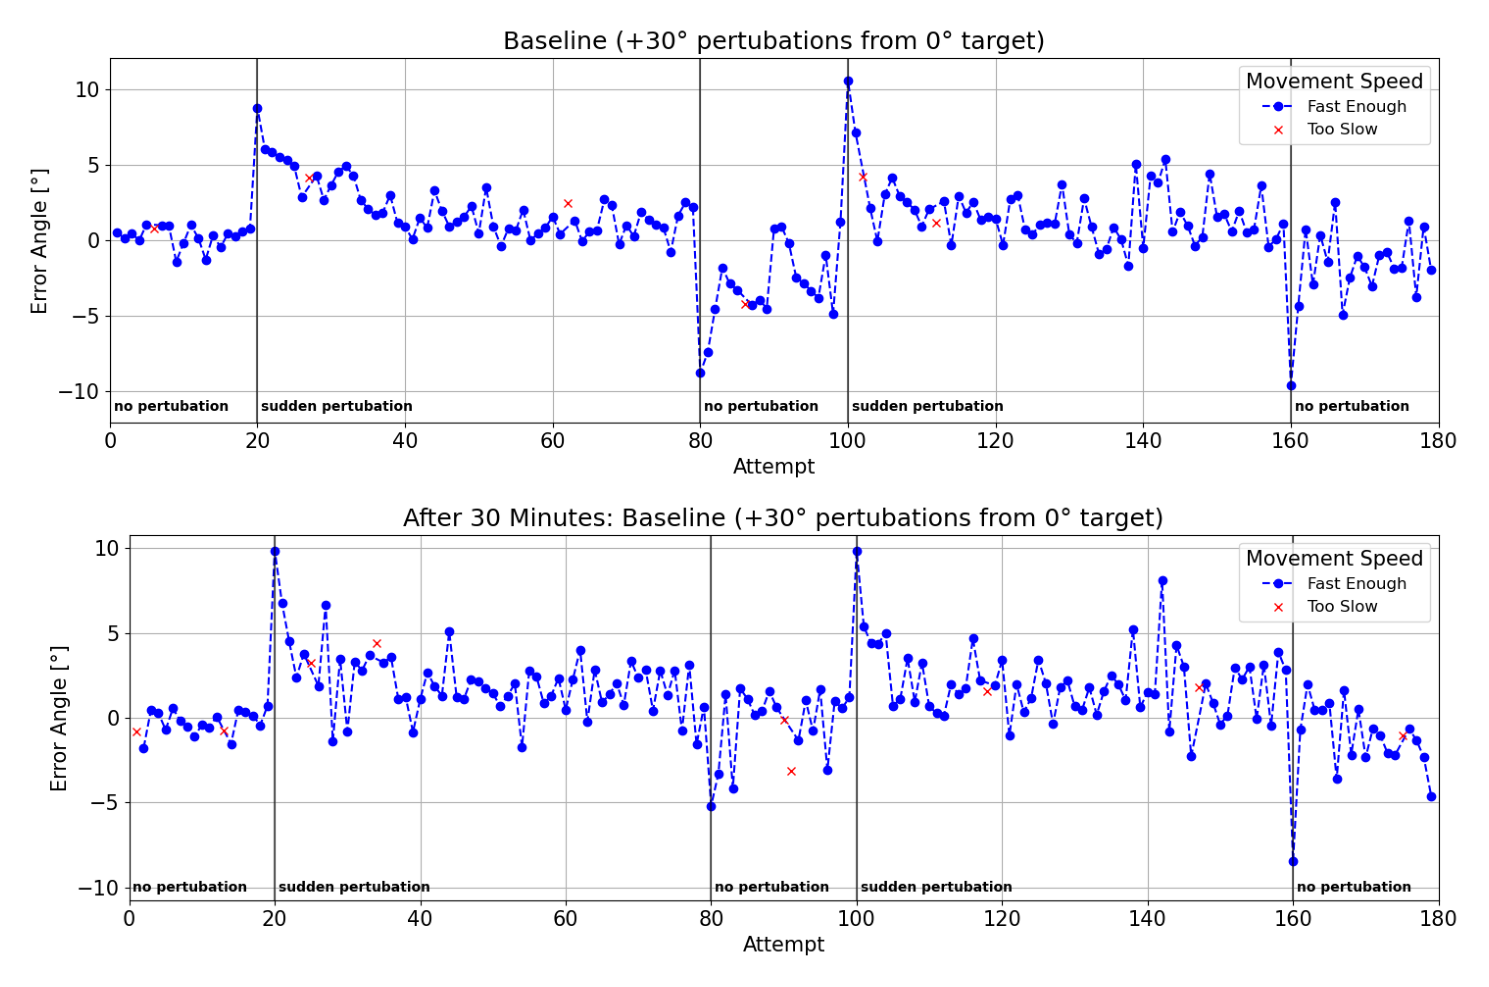

In [46]:
import matplotlib.pyplot as plt

# plot err over attempts
error_before_break_time_plot = plt.imread("error_over_time_base_before.png")
error_after_break_time_plot  = plt.imread("error_over_time_base_after.png")

plt.figure(figsize=(15, 21))
plt.subplot(2, 1, 1)
plt.imshow(error_before_break_time_plot )
plt.axis("off")

plt.subplot(1, 1, 1)
plt.imshow(error_after_break_time_plot )
plt.axis("off")
plt.tight_layout()
plt.show()

We observe possibly faster adaptation during the first trials before and after the break compared to the subsequent trial. More pronouncedm we obsere a smaller after-effect for the second trial as well as the trials after the 30 minutes break compared to the first trial. To quantifiy this, we plot the mean absolute error angle ($\pm$ standard error of the mean) of all fast enough attempts per trial before, during and after the pertubation. "Before pertubation" quantifies motor variability, "during pertubation" adaption and "after pertubation" after-effect, but we negflect the time course, e.g. speed, of adaptation through such summarizing statistics. 

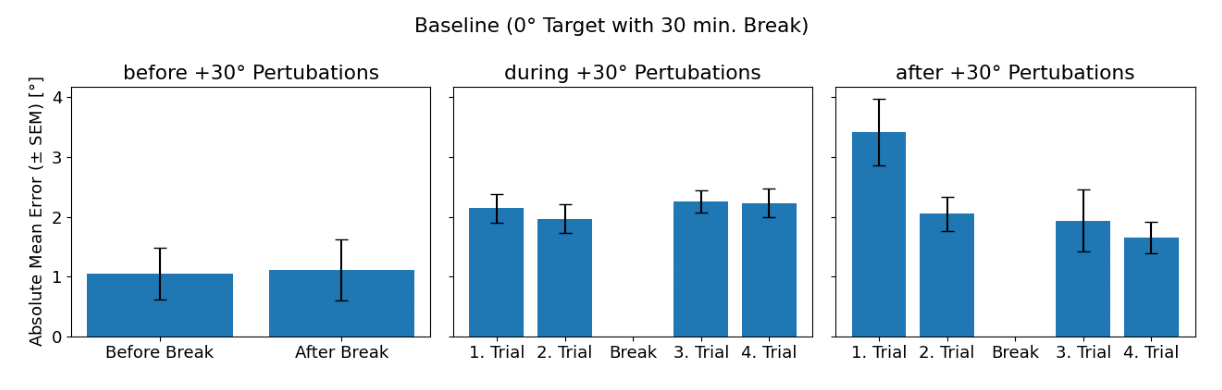

In [47]:
# better plot
error_bar_plot = plt.imread("error_bars_base.png")

plt.figure(figsize=(13, 4))
plt.imshow(error_bar_plot)
plt.axis("off")
plt.tight_layout()
plt.show()

The absolute error after the pertubation is significantly smaller after the first trial, but there is no significant trend comparing the 2. trial (before break) and the 3. and 4. trial. There is no significant trend for the absolute error during pertubations.

#### Generalisation

We record the first and second subject during the generalization task and plot the error angles. 

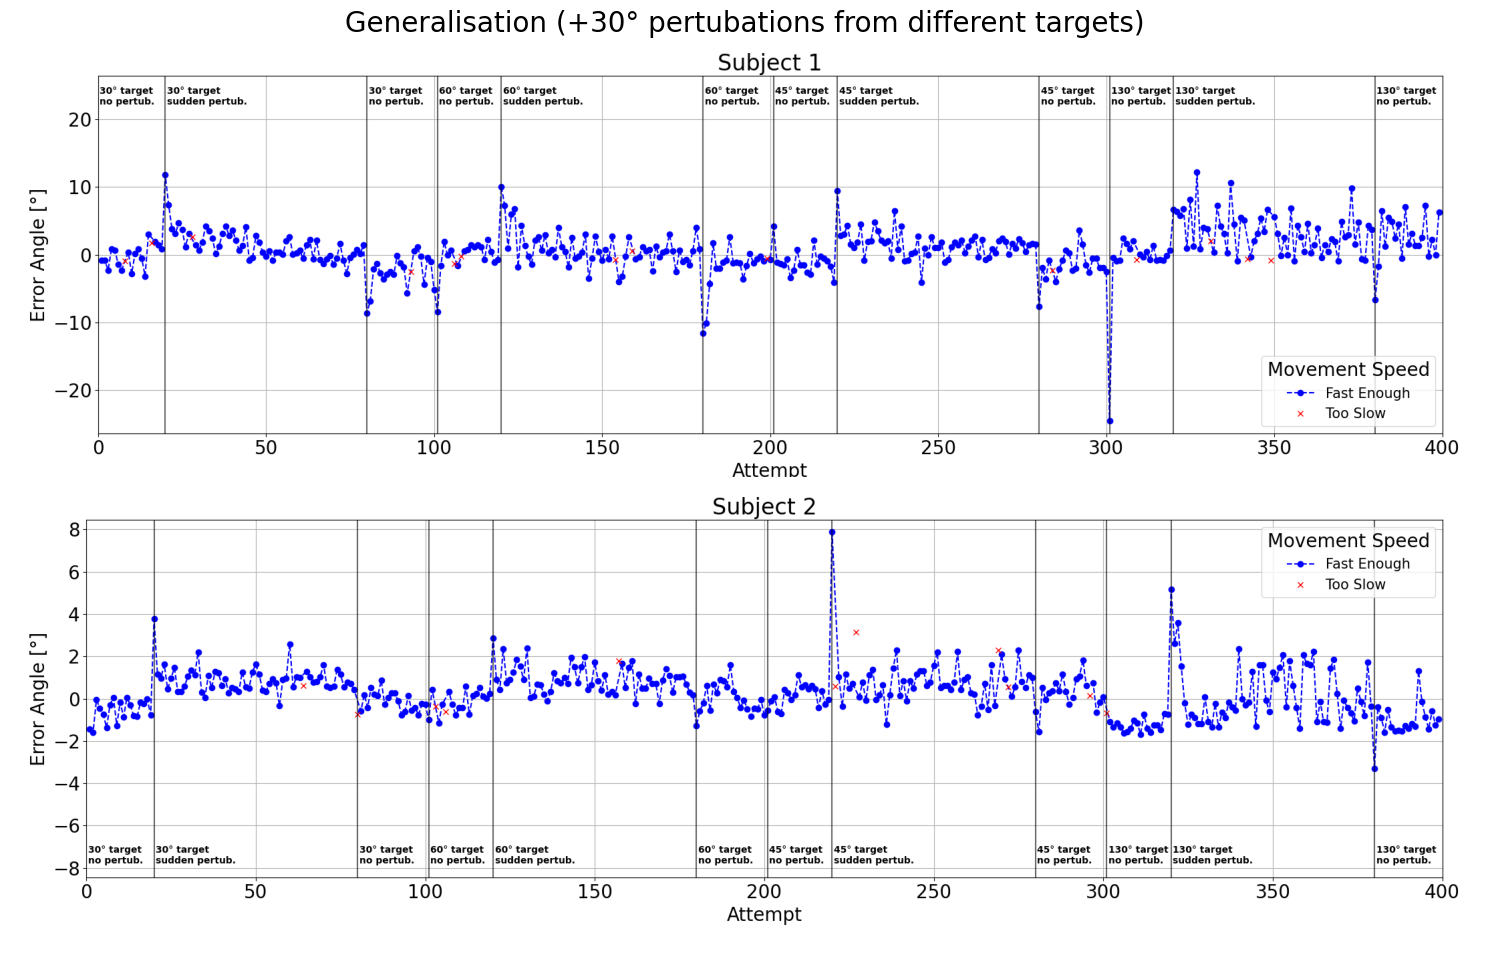

In [48]:
# plot err over attempts
error_time_plot_subject_1 = plt.imread("error_over_time_gen_0.png")
error_time_plot_subject_2 = plt.imread("error_over_time_gen_1.png")

plt.figure(figsize=(15, 20))
plt.subplot(2, 1, 1)
plt.imshow(error_time_plot_subject_1)
plt.axis("off")
plt.subplot(1, 1, 1)
plt.imshow(error_time_plot_subject_2)
plt.axis("off")
plt.suptitle("Generalisation (+30° pertubations from different targets)", fontsize=20, y=0.84)
plt.tight_layout()
plt.show()

The first subject shows higher after-effect and slower adaption, suggesting less cognitive influence than for the second subject. Both subjects seem to show higher absolute errors during the pertubation around 130° but without a long after-effect, which we quantify with the same plot as for the base line.

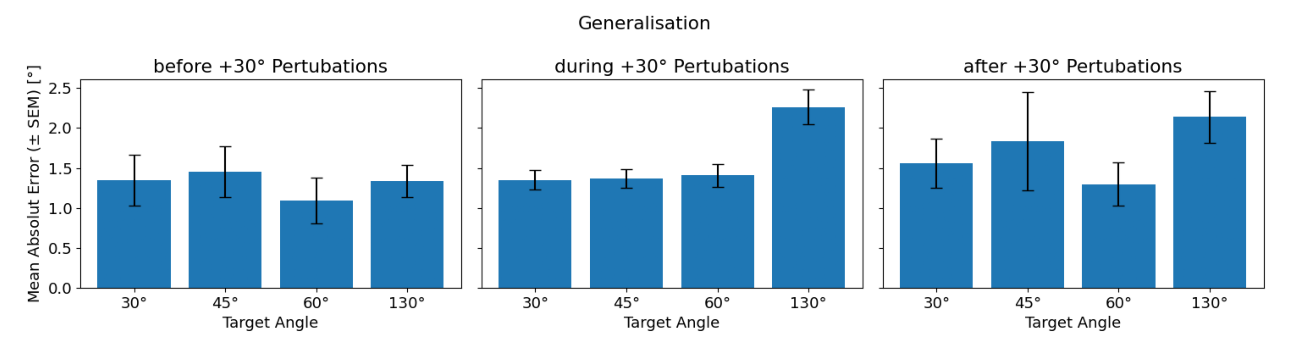

In [49]:
# better plot
error_bar_plot = plt.imread("error_bars_gen.png")

plt.figure(figsize=(13, 4))
plt.imshow(error_bar_plot)
plt.axis("off")
plt.tight_layout()
plt.show()

For target angles closer to the start angle of 30°, the absolute error during pertibations is comparable to the error before pertubation. For 130°, the absolute error increases significantly, but only during pertubation, not before or after. 

### Task 3: Discussion of results
1. Is there any motor adaptation left after 30 minutes?
2. Under which conditions was your subject able to generalize to new target positions?

With one subject, we don't find a significant increase in adaptation after the first trial, neither for an immediate subsequent trial nor after 30 minutes. Indeed, the error after the pertubations decreases, suggesting a lower after-effect and thus less motor adaption. For an increased motor adaptation immediatly after a trial but not after 30 minutes, we would have expected an increased after-effect and faster adaptation for the second but not the first trials before and after the break. Of course, with only one subject we cannot rule such a hypothesis out. 

With two subjects, we observed a generalization to and only to close enough target angles. While there are were no significant differences in after-effect over both subjects, the error during pertubation increases for both subjects for a target angle of 130 degrees away, while the error for closer targets up to 60 degrees remain within levels of motor variability. This fits with the results from the lecture, while the after-effect might be explained by the cognitive influence of especially the second subject, suggesting rather "learning" of motor adaptation not due to the cerebelar forward model. 

### Task 4: Finger Generalisation Task 

| Attempts | Finger Used | Perturbation Type | Perturbation Angle | Target Angle |
| :-: | :-:| :-: | :-: | :-: |
| 1 - 20 | Index | - | - | 0° |
| 21 - 80 | Index | sudden | 30° | 0° |
| 81 - 100 | Index | - | - | 0° |
| 101 - 160 | Index | sudden | 30° | 0° |
| 161 - 180 | Index | - | - | 0° |
| 181 - 200 | Middle | - | - | 0° |
| 201 - 260 | Middle | sudden | 30° | 0° |
| 261 - 280 | Middle | - | - | 0° |
| 281 - 340 | Middle | sudden | 30° | 0° |
| 341 - 360 | Middle | - | - | 0° |

We investigated whether there was adaptation across using different fingers for the reaching task. This seems interesting, since it might show how motor adaptation of different close-by body parts might influence each other. 

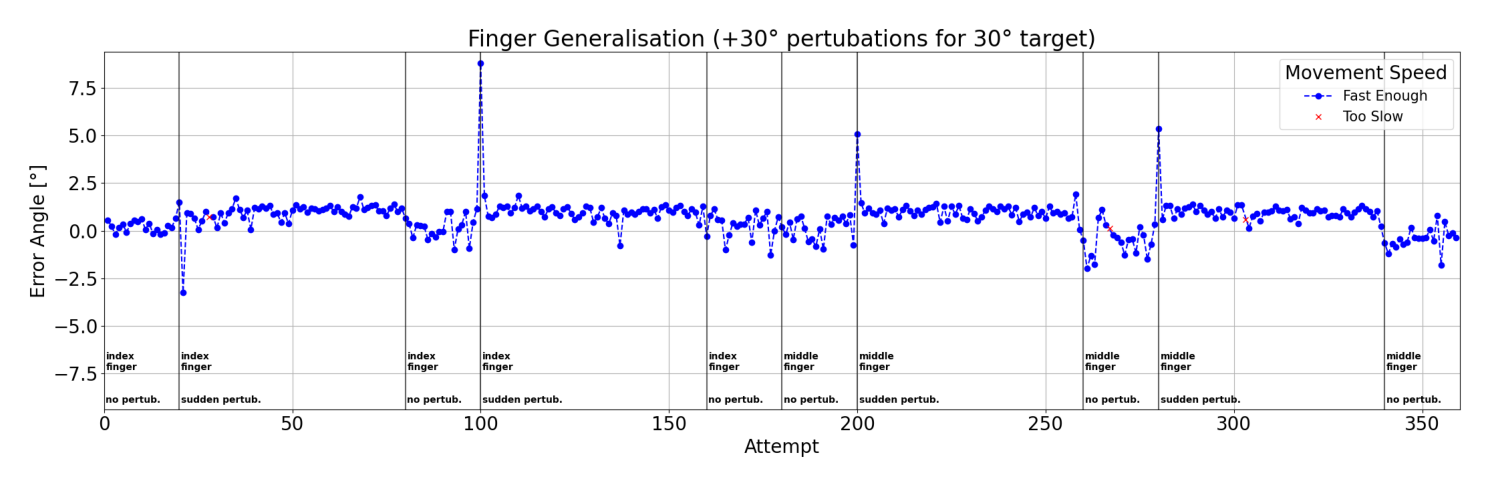

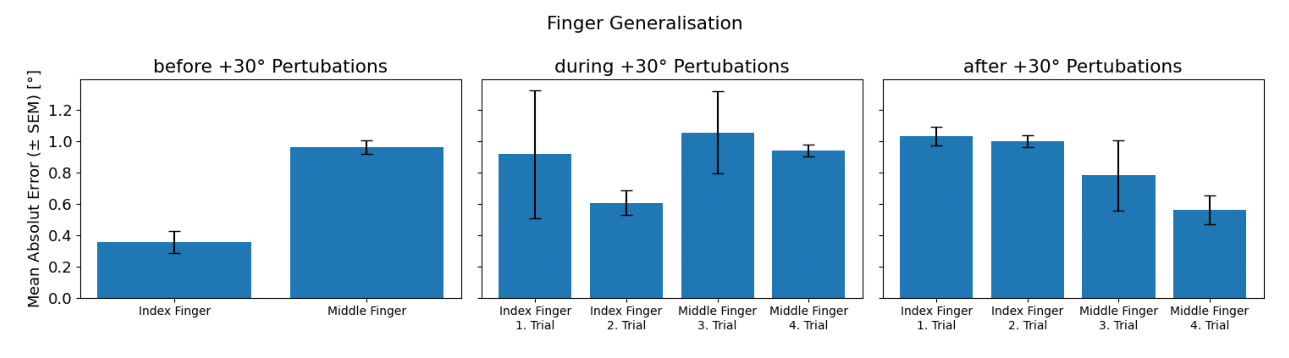

In [50]:
# plot err over attempts
error_time_plot_finger = plt.imread("error_over_time_finger.png")

plt.figure(figsize=(15, 10))
plt.imshow(error_time_plot_finger)
plt.axis("off")
plt.tight_layout()
plt.show()

# better plot
error_bar_plot = plt.imread("error_bars_finger.png")
plt.figure(figsize=(13, 4))
plt.imshow(error_bar_plot)
plt.axis("off")
plt.tight_layout()
plt.show()

In the first plot, the second subject seemed to show immediate motor adaption and nearly no after-effect, suggesting no involevement of the cerebelar forward model. Indeed, we don't find no significant trend in the second plot, with errors during and after pertubation within the motor variability, which can be explained by the fact that the subject learned to solve the task after so many trials of the first generalization task.